# Importing modules

In [2135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Data Cleaning

### loading & exploring Data

In [2136]:
re_df = pd.read_excel('Data_MidTerm_Project_Real_State_Regression.xls')

In [2137]:
re_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [2138]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [2139]:
re_df['date'] = re_df['date'].dt.to_period('M')

In [2140]:
re_df['date'] = re_df['date'].dt.strftime('%m/%Y')

In [2141]:
re_df['date'].value_counts()

04/2015    2229
07/2014    2211
06/2014    2178
08/2014    1939
10/2014    1876
03/2015    1875
09/2014    1771
05/2014    1768
12/2014    1470
11/2014    1409
02/2015    1247
01/2015     978
05/2015     646
Name: date, dtype: int64

In [2142]:
#re_df = re_df[re_df.date != "05/2015"]
#re_df = re_df[re_df.date != "01/2015"]

### droping columns

In [2143]:
re_df.drop(['id'],axis=1, inplace=True)
#re_df.drop(['view'],axis=1, inplace=True)
re_df.drop(['yr_renovated'],axis=1, inplace=True)
re_df.drop(['sqft_above'],axis=1, inplace=True)
#re_df.drop(['long'],axis=1, inplace=True)
#re_df.drop(['lat'],axis=1, inplace=True)

### removing duplicates

In [2144]:
re_df.drop_duplicates(inplace=True)

### droping nan values

In [2145]:
#re_df.view.hist()
#re_df.dropna(inplace=True)
#re_df

### renaming waterfront column features

In [2146]:
def clean_waterfront(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'

In [2147]:
re_df["waterfront"] = list(map(clean_waterfront,re_df["waterfront"])) 

### changing year renovated

def yr_renovated(x):
    if x == 0:
        return 'no'
    else:
        return 'yes'

re_df["yr_renovated"] = list(map(yr_renovated,re_df["yr_renovated"]))

### removing outliers

#### bedrooms

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

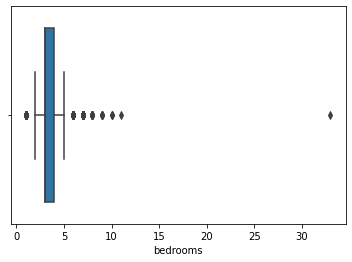

In [2148]:
sns.boxplot(re_df['bedrooms'])

In [2149]:
max(re_df['bedrooms'])

33

In [2150]:
#re_df = re_df[re_df.bedrooms != max(re_df['bedrooms'])]

re_df.loc[re_df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,06/2014,33,1.75,1620,6000,1.0,no,0,5,7,580,1947,98103,47.6878,-122.331,1330,4700,640000


Based on the sqft_living we asume that there is typing error

In [2151]:
re_df.at[15856,'bedrooms'] = 3

#### bathrooms

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

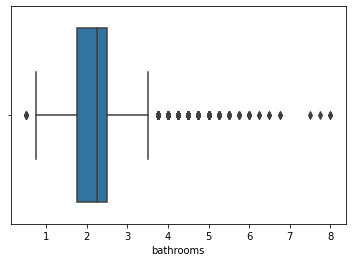

In [2152]:
sns.boxplot(re_df['bathrooms'])

In [2153]:
re_df['bathrooms'].value_counts()

re_df = re_df[re_df.bathrooms != max(re_df['bathrooms'])]
#re_df = re_df[re_df.bathrooms != 7.75]

#### sqft_lot

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot'>

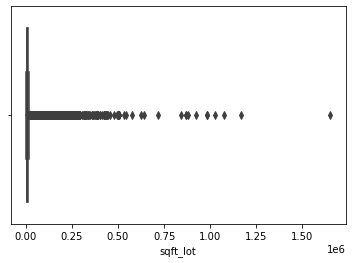

In [2154]:
sns.boxplot(re_df['sqft_lot'])

In [2155]:
max(re_df['sqft_lot'])

1651359

In [2156]:
re_df.loc[re_df['sqft_lot'] == 1651359]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
1717,03/2015,4,1.0,1300,1651359,1.0,no,3,4,6,0,1920,98022,47.2313,-122.023,2560,425581,700000


In [2157]:
re_df.at[1717,'sqft_lot'] = 16513.59

#### price

In [2158]:
re_df = re_df[re_df['price'] < 4000000]

## Plot the Correlation Heatmap

re_num = re_df[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement']]

corr = re_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Split Data into groups

In [2159]:
expensive_zipcodes= [98199, 98119, 98109, 98102, 98105, 98112, 98033, 98039, 98004, 98005, 98040, 98006, 98075]
expensive_areas = re_df[re_df['zipcode'].isin(expensive_zipcodes)]

In [2160]:
affordable_areas = re_df[~re_df['zipcode'].isin(expensive_zipcodes)]

## X Y split

In [2161]:
X=expensive_areas.drop("price", axis=1)
y=expensive_areas["price"]

## Data Splitting

In [2162]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [2163]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Transformation

### Hot coding Categorical Variables

In [2164]:
X_train_cat=X_train[['date','bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long']]
X_train_cat

X_test_cat=X_test[['date','bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long']]
X_test_cat

,date,bedrooms,bathrooms,view,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
11440,06/2014,3,1.75,0,1.0,no,3,8,1976,98011,47.7687,-122.223
2348,11/2014,3,1.00,0,1.0,no,3,6,1959,98008,47.6195,-122.118
4865,06/2014,2,1.75,2,1.0,no,3,8,1983,98092,47.2645,-122.163
2218,01/2015,3,1.75,0,1.5,no,3,6,1915,98034,47.7244,-122.222
4769,06/2014,2,1.75,0,2.0,no,3,8,2014,98029,47.5519,-121.999
...,...,...,...,...,...,...,...,...,...,...,...,...
9522,07/2014,4,2.50,0,2.0,no,3,9,2013,98059,47.5019,-122.151
7422,08/2014,3,1.75,0,1.0,no,4,7,1978,98092,47.3187,-122.180
20299,09/2014,4,2.50,0,2.0,no,3,9,2014,98001,47.3359,-122.257
1893,05/2014,4,2.75,0,1.0,no,3,8,1917,98122,47.6053,-122.291


In [2165]:
X_train_cat=pd.get_dummies(X_train_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names(input_features=X_train_cat.columns))

X_test_cat=pd.get_dummies(X_test_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names(input_features=X_test_cat.columns))

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,...,date_05/2014_1,date_05/2015_1,date_06/2014_1,date_07/2014_1,date_08/2014_1,date_09/2014_1,date_10/2014_1,date_11/2014_1,date_12/2014_1,waterfront_yes_1
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5479,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2166]:
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

### Standardize numerical

In [2167]:
X_train_num=X_train[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
X_train_num

X_test_num=X_test[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
X_test_num

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_basement
11440,1520,8625,2080,9200,0
2348,940,7811,1180,7490,0
4865,1490,224334,2350,213879,0
2218,1850,10920,1510,7871,0
4769,1210,1040,1210,1090,0
...,...,...,...,...,...
9522,2810,6296,2850,6140,0
7422,1490,8000,1540,8000,290
20299,2891,6499,2550,8383,0
1893,2020,2750,1840,4000,1010


In [2168]:
std_scaler=StandardScaler().fit(X_train_num)   ## finding the parameters (mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_num)

In [2169]:
X_test_scaled=std_scaler.transform(X_test_num)

In [2170]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.41890892 -0.32458812 -1.0842871  -0.40295635 -0.63363331]
 [-0.81766198 -0.33618554 -0.95606967 -0.42081659 -0.63363331]
 [ 0.23359609 -0.13835261 -0.65155329 -0.11697942 -0.63363331]
 ...
 [-1.50641726 -0.24704638 -1.46893938 -0.28496512 -0.63363331]
 [ 0.91268463 -0.18509233  1.89356263  2.02276996 -0.63363331]
 [-0.15307354 -0.19570969  0.3902133  -0.19619652  0.22144536]]
--------
[[-0.5518266  -0.16245752  0.29405023 -0.13583387 -0.63363331]
 [-1.25266531 -0.18145209 -1.14839581 -0.1965516  -0.63363331]
 [-0.58807688  4.8710815   0.72678405  7.13179355 -0.63363331]
 ...
 [ 1.10481111 -0.21206743  1.04732762 -0.16484345 -0.63363331]
 [ 0.0523447  -0.29954981 -0.09060205 -0.32047256  1.83387943]
 [-0.08057299  1.44645765  0.37418613  0.85219617 -0.63363331]]


In [2171]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_num.columns)

In [2172]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

### Quantile Transformer

In [2173]:
qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_living15'] = qt.transform(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_living15'] = qt.transform(X_test_scaled['sqft_living15'].to_numpy().reshape(-1,1))

In [2174]:
qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_lot15'] = qt.transform(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_lot15'] = qt.transform(X_test_scaled['sqft_lot15'].to_numpy().reshape(-1,1))

qt = QuantileTransformer(output_distribution="normal").fit(y_train.to_numpy().reshape(-1,1))
y_train = qt.transform(y_train.to_numpy().reshape(-1,1))
y_test = qt.transform(y_test.to_numpy().reshape(-1,1))

## Concatination 

In [2175]:
X_train_con=pd.concat([X_train_scaled,X_train_cat],axis=1)
X_test_con=pd.concat([X_test_scaled,X_test_cat],axis=1)

In [2176]:
X_train_con

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_basement,bedrooms,bathrooms,view,floors,condition,...,date_05/2014,date_05/2015,date_06/2014,date_07/2014,date_08/2014,date_09/2014,date_10/2014,date_11/2014,date_12/2014,waterfront_yes
0,-0.418909,-0.324588,-1.310017,-1.750415,-0.633633,3,3.25,0,3.0,3,...,0,0,1,0,0,0,0,0,0,0
1,-0.817662,-0.336186,-1.077446,-2.408550,-0.633633,3,2.25,0,3.0,3,...,0,0,0,0,0,0,0,0,1,0
2,0.233596,-0.138353,-0.571638,0.652867,-0.633633,4,2.75,0,1.5,3,...,0,0,0,0,0,1,0,0,0,0
3,-0.600160,-0.331379,-0.619578,-1.783257,-0.633633,3,2.50,0,3.0,3,...,0,0,0,0,0,0,0,0,0,0
4,-1.071414,-0.216244,-0.644086,-0.185480,-0.145017,3,1.00,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,0.475265,4.718612,1.664082,2.041688,-0.633633,3,2.25,0,2.0,3,...,1,0,0,0,0,0,0,0,0,0
12788,1.550690,1.781010,1.018778,1.942487,-0.633633,3,2.50,0,2.0,4,...,0,0,0,0,0,1,0,0,0,0
12789,-1.506417,-0.247046,-2.131682,-0.758004,-0.633633,2,2.75,0,1.0,3,...,0,0,0,0,0,0,0,0,1,0
12790,0.912685,-0.185092,1.643397,1.964033,-0.633633,6,5.00,0,2.0,3,...,0,0,0,0,0,0,1,0,0,0


##  Apply Linear Regression

### Modelling using Statsmodels

In [2177]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1297.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:20:42   Log-Likelihood:            -1.6856e+05
No. Observations:               12792   AIC:                         3.372e+05
Df Residuals:                   12763   BIC:                         3.374e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.647e+06    2.5e+06     -3.

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [2178]:
predictions_test

0       515417.968314
1       221750.694338
2       408914.575905
3       494879.760659
4       407181.586453
            ...      
5478    586862.336711
5479    213891.687917
5480    491026.203524
5481    591635.369510
5482    384286.659575
Length: 5483, dtype: float64

In [2179]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7394300706729023


### Modeling using Scikit Learn

In [2180]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

LinearRegression()

In [2181]:
model.coef_

array([ 1.17309487e+05,  1.84213517e+04,  3.19571354e+03, -3.06062703e+04,
       -1.48786783e+04, -2.31133063e+04,  2.34498189e+04,  5.85915730e+04,
       -5.37553559e+03,  2.51385439e+04,  7.72896669e+04, -1.69717682e+03,
       -8.52589167e+01,  5.14559423e+05,  3.51286317e+04, -1.02603159e+03,
        1.94195060e+04,  2.56243327e+04, -1.13510562e+04,  2.67067483e+04,
       -1.39709468e+03, -7.13637596e+03, -2.98454770e+03, -6.27398964e+03,
       -6.51081649e+03, -7.25414179e+03, -1.10552599e+04,  5.14618708e+05])

In [2182]:
model.intercept_

-8646757.227645056

Making prediction

In [2183]:
y_pred=model.predict(X_test_con)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [2184]:
y_test

0       366000
1       350000
2       475000
3       257000
4       357186
         ...  
5478    487500
5479    203000
5480    415000
5481    599000
5482    390000
Name: price, Length: 5483, dtype: int64

In [2185]:
y_pred

array([515417.96831137, 221750.69433521, 408914.57590134, ...,
       491026.20352131, 591635.36950635, 384286.65957222])

In [2186]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
0,366000,515417.968311
1,350000,221750.694335
2,475000,408914.575901
3,257000,494879.760656
4,357186,407181.586450
...,...,...
5478,487500,586862.336708
5479,203000,213891.687914
5480,415000,491026.203521
5481,599000,591635.369506


Linear Regression Train-test split. Standardize the data (after the data split). Apply linear regression. Model Interpretation. Model Validation Model Evaluation: MSE. RMSE. MAE. R2. Adjusted R2. Feature Importance.

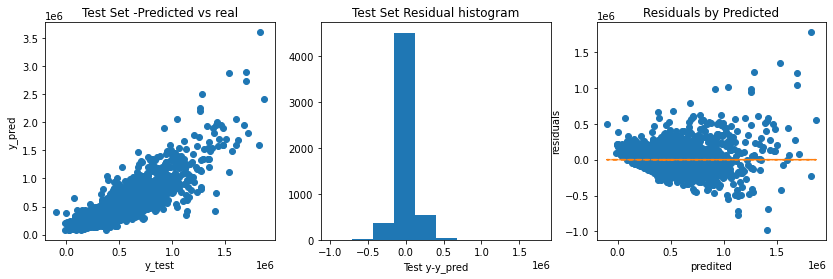

In [2187]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [2188]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

16685427594.123154
87529.28644884813


In [2189]:
R2=r2_score(y_test,y_pred)
R2

0.732304887197972

In [2190]:
X_test.shape[1]

17

In [2191]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7314721668104818

#### Feature Importance

In [2192]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance')

In [2193]:
features_importances

,Attribute,Importance
12,zipcode,85.258917
15,date_02/2015,1026.031595
20,date_06/2014,1397.094681
11,yr_built,1697.176818
22,date_08/2014,2984.547701
2,sqft_living15,3195.713544
8,floors,5375.535591
23,date_09/2014,6273.989639
24,date_10/2014,6510.816487
21,date_07/2014,7136.375960


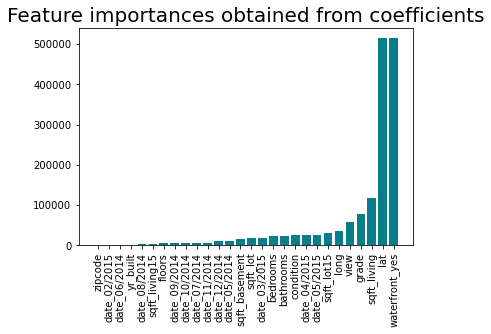

In [2194]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Evaluating predictions

In [2195]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

87529.28644884795

In [2196]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

16685427594.123154

In [2197]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

129172.08519693081

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

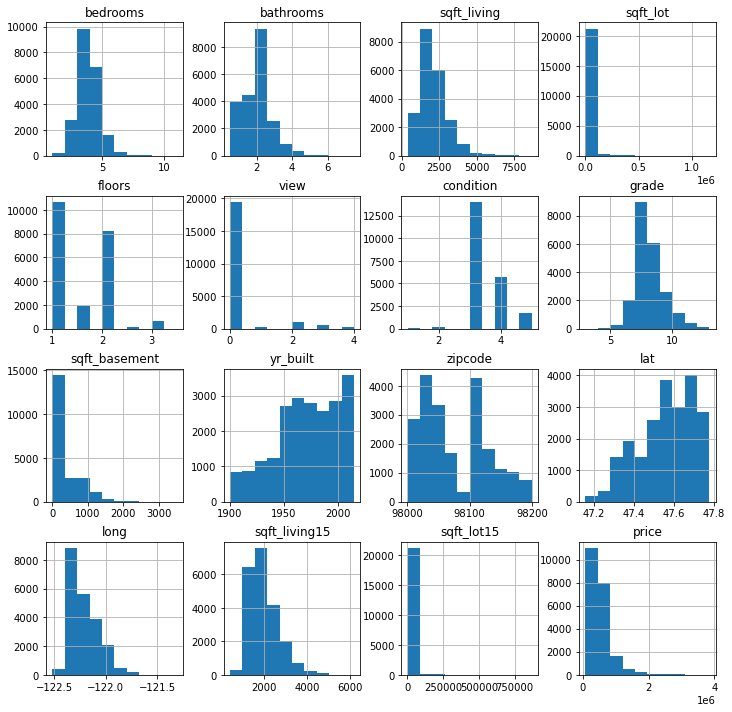

In [2198]:
re_df.hist(figsize=(12,12))